In [283]:
#import libraries
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/cerenkasap/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cerenkasap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [284]:
df=pd.read_csv('./financial-sentiment-analysis/data.csv', error_bad_lines = False, index_col=False)

/Users/cerenkasap/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [286]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

<AxesSubplot:>

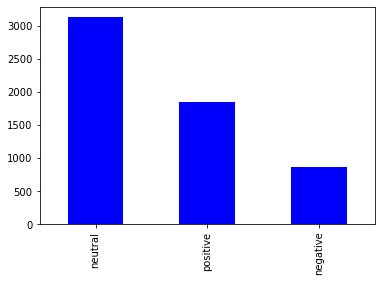

In [287]:
df["Sentiment"].value_counts().plot(kind = "bar", color = "b")


In [288]:
df["Sentiment"].value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [289]:
s0 = df[df.Sentiment=='positive'].sample(860)
s1 = df[df.Sentiment=='neutral'].sample(860)
s2 = df[df.Sentiment=='negative'].sample(860)


df=pd.concat([s0,s1,s2])
df = df.sample(frac=1).reset_index(drop=True)


In [290]:
df["Sentiment"].value_counts()

positive    860
neutral     860
negative    860
Name: Sentiment, dtype: int64

<AxesSubplot:>

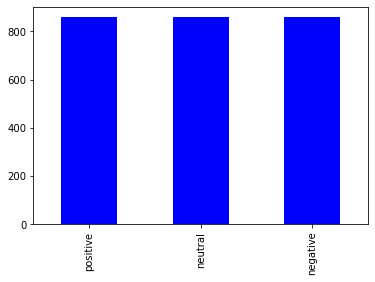

In [291]:
df["Sentiment"].value_counts().plot(kind = "bar", color = "b")

In [292]:
df

,Sentence,Sentiment
0,Irish housebuilder Cairn Homes plans London li...,positive
1,The company did not disclose the price of the ...,neutral
2,Comparable operating profit totaled EUR 4.7 mn...,negative
3,Barclays share price subdued as bank faces fre...,negative
4,ArcelorMittal Chief Executive Officer Lakshmi ...,neutral
...,...,...
2575,The situation of coated magazine printing pape...,neutral
2576,"BHP Billiton slashes dividend, posts $5.67 bil...",negative
2577,Having a China based operation will not only e...,positive
2578,Blyk is launching first in the UK market in mi...,neutral


In [293]:
#Text Cleaning
def Text_Cleaning(Text):    
    # Lowercase the texts
    Text = Text.lower()

    # Cleaning punctuations in the text
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Removing numbers in the text
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    # Deleting newlines
    Text = re.sub('\n', '', Text)

    return Text

#Text Preprocessing
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):    
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    # Tokens of Words
    Tokens = nltk.word_tokenize(Text)

    # Removing Stopwords and Lemmatizing Words
    # To reduce noises in our dataset, also to keep it simple and still 
    # powerful, we will only omit the word `not` from the list of stopwords

    for word in Tokens:
        if word not in Stopwords:            
            Processed_Text.append(Lemmatizer.lemmatize(word))            
    return(" ".join(Processed_Text))

In [294]:
#Apply the functions
df['Sentence'] = df['Sentence'].apply(Text_Cleaning).apply(Text_Processing)


In [295]:
df

,Sentence,Sentiment
0,irish housebuilder cairn home plan london listing,positive
1,company not disclose price acquisition,neutral
2,comparable operating profit totaled eur mn eur...,negative
3,barclays share price subdued bank face fresh f...,negative
4,arcelormittal chief executive officer lakshmi ...,neutral
...,...,...
2575,situation coated magazine printing paper conti...,neutral
2576,bhp billiton slash dividend post billion net loss,negative
2577,china based operation not enable u fully lever...,positive
2578,blyk launching first uk market mid market follow,neutral


In [211]:
#make everything in lowercase
df['Sentence'] = df['Sentence'].str.lower()
df

,Sentence,Sentiment
0,companiesunilever sales lifted by ice cream in...,positive
1,vaisala 's expertise in lightning data and inf...,neutral
2,about elcoteq elcoteq se is a leading electron...,positive
3,"in 2007 , huhtamaki will continue to invest in...",neutral
4,@1nvestor: $soda has a 42.71% float short. lol...,negative
...,...,...
2575,full-year operating result for 2008 was 3.6 mi...,neutral
2576,metso foundries jyvaskyla oy will discontinue ...,neutral
2577,"operating profit totalled eur 7.0 mn , up from...",positive
2578,espn files lawsuit against verizon - http://st...,negative


In [296]:
df.to_csv('financial_data_cleaned.csv', index=False)